# 속도와 HBR과의 관계

In [1]:
from sgp4.api import Satrec
from sgp4.api import jday
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord, TEME
from datetime import timedelta, datetime
import pandas as pd
import requests
import json
import configparser
from tqdm import tqdm
from math import sqrt
import json
import requests
import configparser
import time

from math import exp


## 1. celestrak과 spacemap의 HBR _scatter 
(x축: spacemapHBR, y축: celestrakHBR)

0.5865273272924025
0.0738006646181934


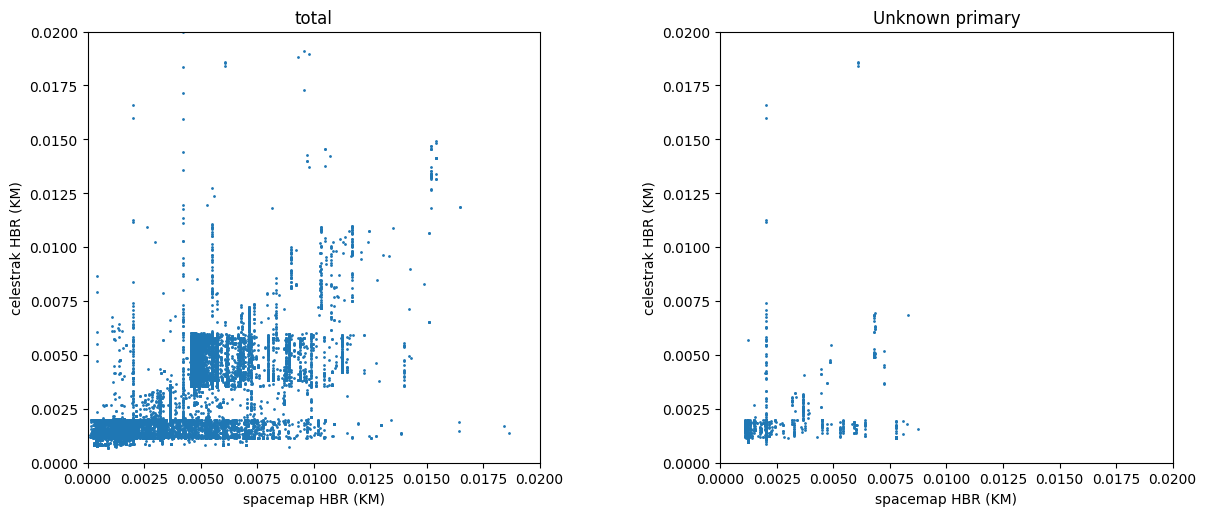

In [28]:
data_trueprob = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Main/Alfano Pcmax/Conjunction Assesement Result/Spacemap_CA_Result(Variable_HBR)/Spacemap_CA_09m24d13h_HBR2.csv')
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1)

ax1.scatter(data_trueprob['HBR_SPACEMAP'],data_trueprob['HBR_CELESTRAK'],s=1)
ax1.set_xlabel('spacemap HBR (KM)')
ax1.set_ylabel('celestrak HBR (KM)')
ax1.set_xlim(0,0.02)
ax1.set_ylim(0,0.02)
ax1.set_title('total')
print(data_trueprob['HBR_SPACEMAP'].corr(data_trueprob['HBR_CELESTRAK']))

ax2=fig.add_subplot(2,2,2)
data_trueprob = data_trueprob[data_trueprob['OBJECT_CLASS_1']=='Unknown']

ax2.scatter(data_trueprob['HBR_SPACEMAP'],data_trueprob['HBR_CELESTRAK'],s=1)
ax2.set_xlabel('spacemap HBR (KM)')
ax2.set_ylabel('celestrak HBR (KM)')
ax2.set_xlim(0,0.02)
ax2.set_ylim(0,0.02)
ax2.set_title('Unknown primary')
print(data_trueprob['HBR_SPACEMAP'].corr(data_trueprob['HBR_CELESTRAK']))
plt.subplots_adjust(wspace=0.4, hspace=0.5) 

100%|██████████| 4/4 [00:12<00:00,  3.22s/it]


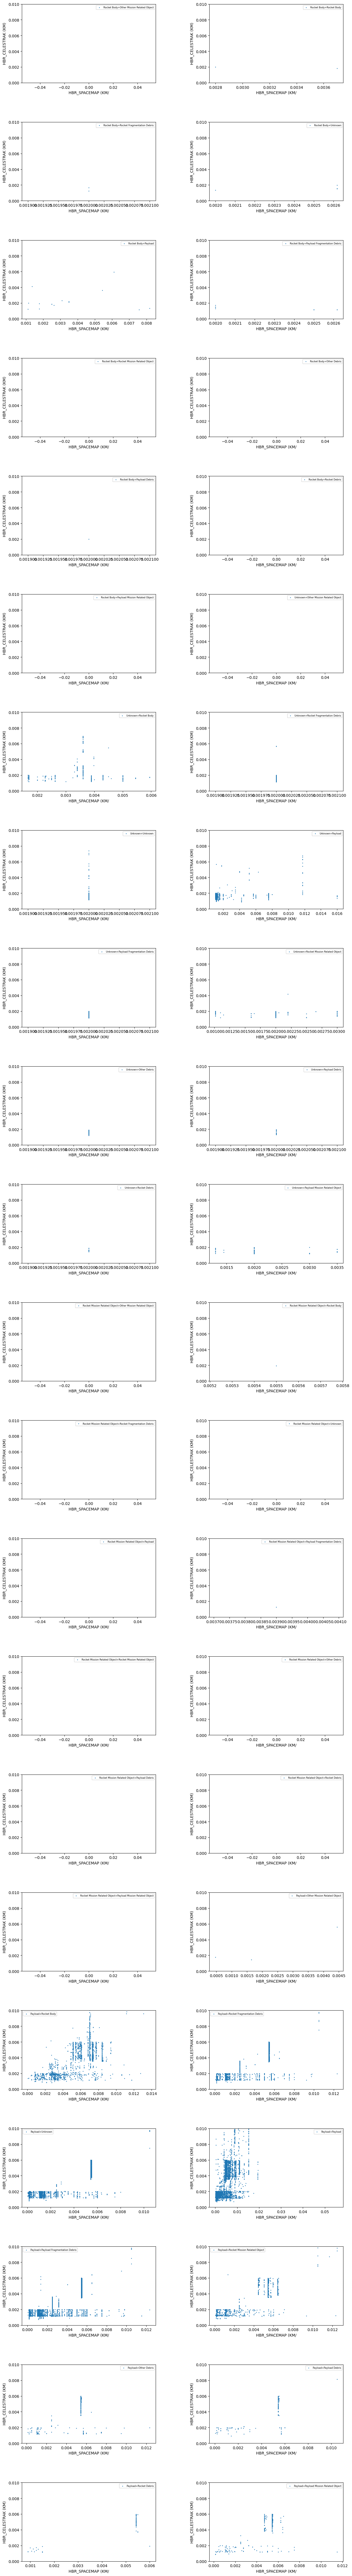

In [20]:
data_trueprob = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Main/Alfano Pcmax/Conjunction Assesement Result/Spacemap_CA_Result(Variable_HBR)/Spacemap_CA_09m24d13h_HBR.csv')
# data_trueprob = pd.read_csv('C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/Alfano/Alfano_24d13h_HBR.csv')
data = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Main/Alfano Pcmax/Conjunction Assesement Result/Spacemap_CA_Result(Variable_HBR)/Spacemap_CA_09m24d13h4.csv')
data=data[1::2].reset_index()
data_trueprob = data_trueprob.fillna('Noshape')
#objectclass 리스트출력
obj1 = list(set(data_trueprob['OBJECT_CLASS_1']))
obj2 = list(set(data_trueprob['OBJECT_CLASS_2']))
# Create a figure and specify the number of rows and columns
fig, axes = plt.subplots(22, 2, figsize=(15, 120))
count = 0

for j in tqdm(obj1):
    for k in obj2:
        x1, y1 = [], []
        for i in range(len(data_trueprob)):
            if data_trueprob['OBJECT_CLASS_1'][i] == j and data_trueprob['OBJECT_CLASS_2'][i] == k:
                x1.append(data['HBR'][i])
                y1.append(data_trueprob['HBR_CELESTRAK'][i])
                
        # Get the current subplot (ax) based on the count
        ax = axes[count // 2, count % 2]

        ax.scatter(x1, y1, s=1, label=f'{j}+{k}')
 
        ax.set_xlabel('HBR_SPACEMAP (KM/')
        ax.set_ylim(0, 0.01)
        ax.set_ylabel('HBR_CELESTRAK (KM)')
        ax.legend(fontsize=6)
        count += 1
plt.subplots_adjust(wspace=0.4, hspace=0.5) 
plt.show()

# 2. 전체 pairs의 분포  (x : 속도  y : HBR)

Text(0, 0.5, 'Celestrak HBR (KM)')

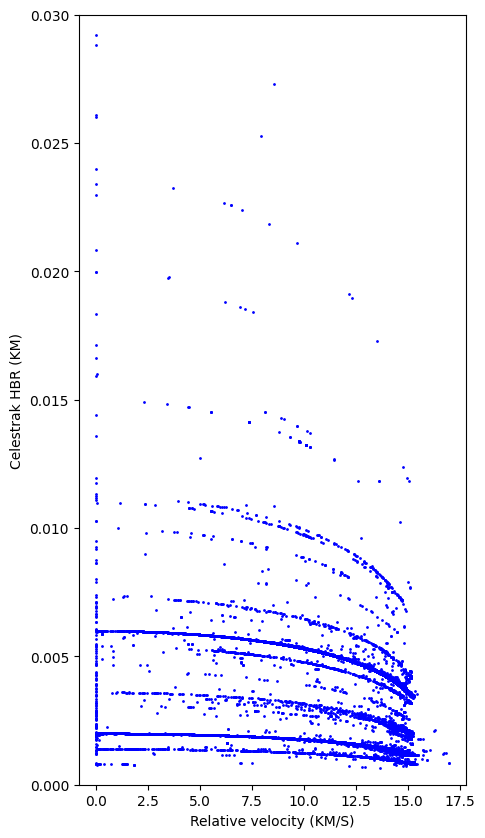

In [10]:
data_trueprob = data_trueprob.fillna('Noshape')
plt.figure(figsize=(5,10))
plt.ylim(0,0.03)
x1= data_trueprob['TCA_RELATIVE_SPEED']
y1=(data_trueprob['HBR_CELESTRAK'])
plt.scatter(x1,y1,s=1,color='b')
plt.xlabel('Relative velocity (KM/S)')
plt.ylabel('Celestrak HBR (KM)')


## 3. ObjectClass별로 Classify (x : 속도  y : HBR)

In [10]:
#objectclass 리스트출력
obj1 = list(set(data_trueprob['objectClass1']))
obj2 = list(set(data_trueprob['objectClass2']))

100%|██████████| 4/4 [00:49<00:00, 12.27s/it]


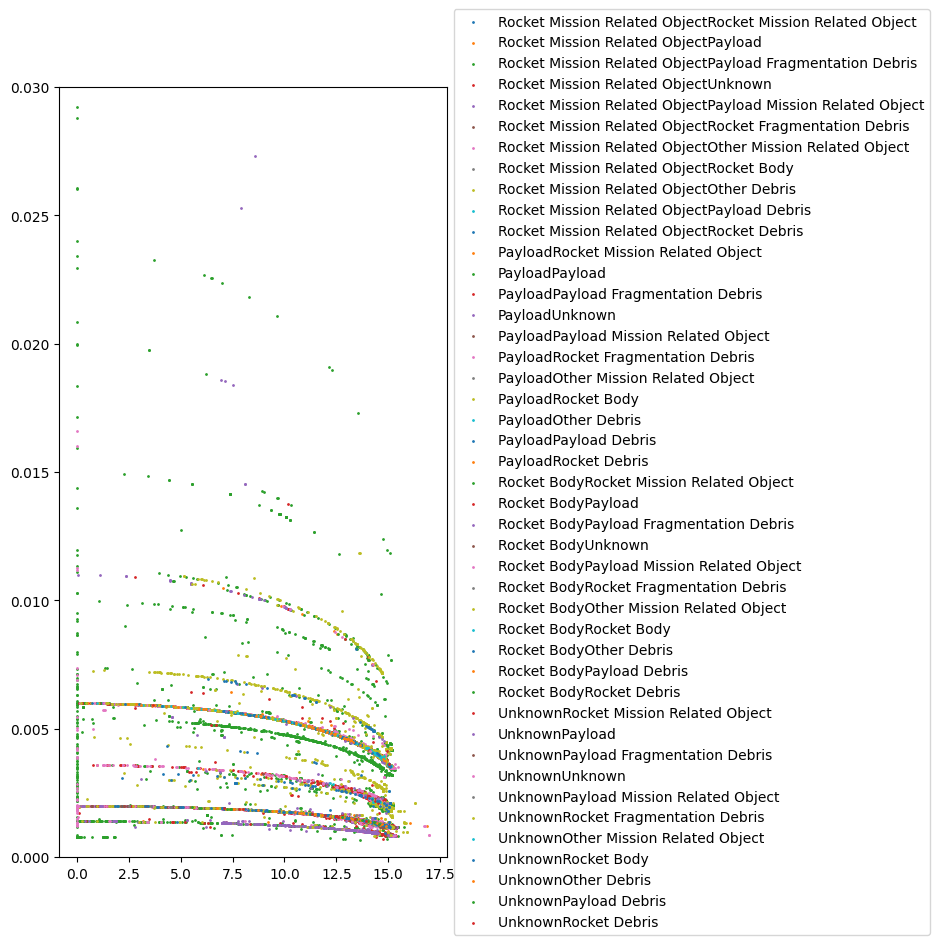

In [18]:
data_trueprob = pd.read_csv('C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/Alfano/Alfano_24d13h_HBR.csv')
# data_trueprob = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Alfano/Alfano_24d13h_total_HBR.csv')
data_trueprob = data_trueprob.fillna('Noshape')
plt.figure(figsize=(5,10))
plt.ylim(0,0.03)

for j in tqdm(obj1): 
    for k in obj2:
        x1,y1=[],[]
        for i in range(len(data_trueprob)):
            if data_trueprob['objectClass1'][i]==j  and data_trueprob['objectClass2'][i]==k:
                x1.append(data_trueprob['Velocity'][i])
                y1.append(data_trueprob['celestrak_HBR'][i])

        plt.scatter(x1,y1,s=1,label=j+k)
        
        
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### 3-1. ObjectClass별로 Classify. case마다 scatter 출력 (x : 속도  y : HBR)

In [12]:
data_trueprob['OBJECT_CLASS_1'].value_counts()

OBJECT_CLASS_1
Payload                          33597
Unknown                           2865
Rocket Body                         33
Rocket Mission Related Object        2
Name: count, dtype: int64

100%|██████████| 4/4 [00:09<00:00,  2.41s/it]


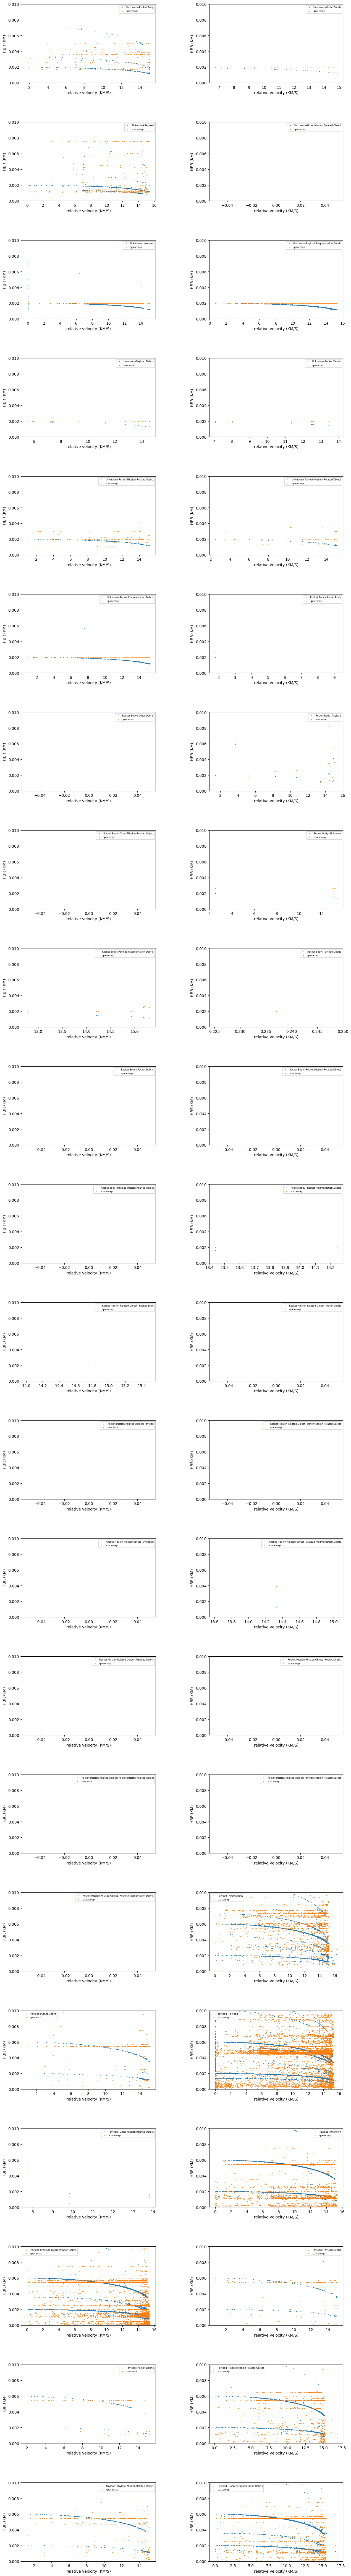

In [14]:
data_trueprob = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Alfano/Alfano_24d13h_total_HBR.csv')
# data_trueprob = pd.read_csv('C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/Alfano/Alfano_24d13h_HBR.csv')
data_trueprob = data_trueprob.fillna('Noshape')

# Create a figure and specify the number of rows and columns
fig, axes = plt.subplots(22, 2, figsize=(15, 120))
count = 0

for j in tqdm(obj1):
    for k in obj2:
        x1, y1, z1 = [], [], []
        for i in range(len(data_trueprob)):
            if data_trueprob['objectClass1'][i] == j and data_trueprob['objectClass2'][i] == k:
                x1.append(data_trueprob['Velocity'][i])
                y1.append(data_trueprob['celestrak_HBR'][i])
                z1.append(data_trueprob['spacemap_HBR'][i])

        # Get the current subplot (ax) based on the count
        ax = axes[count // 2, count % 2]

        ax.scatter(x1, y1, s=1, label=f'{j}+{k}')
        ax.scatter(x1, z1, s=1, label='spacemap')
        ax.set_xlabel('relative velocity (KM/S)')
        ax.set_ylim(0, 0.01)
        ax.set_ylabel('HBR (KM)')
        ax.legend(fontsize=6)
        count += 1
plt.subplots_adjust(wspace=0.4, hspace=0.5) 
plt.show()

# 3-2 shape별 objectclass별 하나만 보기

In [1]:
import ipywidgets as widgets
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interact, Button
from IPython.display import display, clear_output
%matplotlib widget
data_trueprob = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Alfano/Alfano_24d13h_total_HBR.csv')
data_trueprob = data_trueprob.fillna('Noshape')
@interact(Shape1=data_trueprob['Shape1'].unique(), Shape2=data_trueprob['Shape2'].unique(),
          ObjectClass1=data_trueprob['objectClass1'].unique(), ObjectClass2=data_trueprob['objectClass2'].unique())
def create_scatter(Shape1, Shape2, ObjectClass1, ObjectClass2):

    filtered_data = data_trueprob[(data_trueprob['Shape1'] == Shape1) & (data_trueprob['Shape2'] == Shape2) &
                                  (data_trueprob['objectClass1'] == ObjectClass1) & (data_trueprob['objectClass2'] == ObjectClass2)]
    plt.close() 
    with plt.style.context("ggplot"):
        
        sns.scatterplot(data=filtered_data, x='Velocity', y='celestrak_HBR', s=20)
        print('Shape1 List')
        print((data_trueprob[(data_trueprob['objectClass1'] == ObjectClass1) &
                            (data_trueprob['objectClass2'] == ObjectClass2)].loc[:, 'Shape1'].unique()))
        print('Shape2 List')
        print((data_trueprob[(data_trueprob['objectClass1'] == ObjectClass1) &
                            (data_trueprob['objectClass2'] == ObjectClass2)].loc[:, 'Shape2'].unique()))
        plt.xlabel('TCA_RELATIVE_SPEED')
        plt.ylabel('celestrak_HBR')
        plt.xlim(0,16)
        plt.ylim(0,0.01)
        plt.title(f"Shape1 = {Shape1} and Shape2 = {Shape2}")

        plt.show()

interactive(children=(Dropdown(description='Shape1', options=('Hex Cyl + 2 Pan', 'Box + 2 Pan', 'Box', 'Box + …

No such comm: 5dbeebe3b63a4b2cbb3c80631f29b55f
No such comm: 5dbeebe3b63a4b2cbb3c80631f29b55f


No such comm: 16d44032f3834f9990e1087fca09e4c9
No such comm: 16d44032f3834f9990e1087fca09e4c9
No such comm: 16d44032f3834f9990e1087fca09e4c9


No such comm: 1742cd8a6b1d47a882eca82fd3408255






# ---------------------------------------------------------

# UNKNOWN Primary HBR - 함수 fitting

primary : unknown 중 secondary 빈도수가 가장 높은 케이스를 표본으로 fitting

In [5]:
# secodary 별 빈도수
data = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Alfano/Alfano_24d13h_total_다갖다붙임.csv')
data[data['objectClass1']=='Unknown']['objectClass2'].value_counts()

objectClass2
Unknown                           743
Payload Fragmentation Debris      690
Payload                           622
Rocket Body                       268
Rocket Fragmentation Debris       259
Rocket Mission Related Object     166
Payload Mission Related Object     58
Other Debris                       32
Payload Debris                     15
Rocket Debris                      12
Name: count, dtype: int64

이상치 개수: 298
총 개수: 2865
이상치 비율 0.10401396160558464


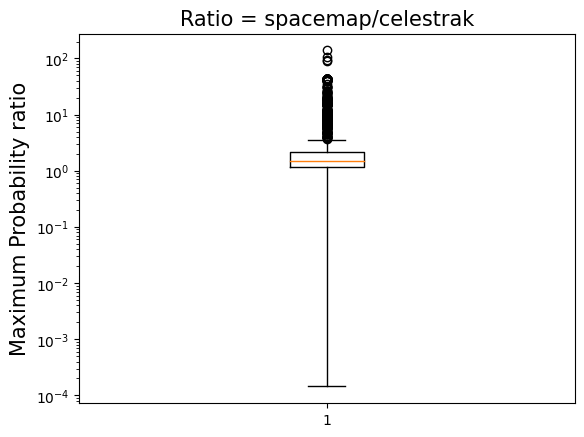

In [23]:
# primary unknown일때의 error 분포
data = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Main/Alfano Pcmax/Conjunction Assesement Result/Spacemap_CA_Result(Variable_HBR)/Spacemap_CA_09m24d13h_HBR.csv')
# data = pd.read_csv('C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/Alfano/Alfano_24d13h_HBR.csv')

data = data[data['OBJECT_CLASS_1']=='Unknown']
fig, ax1 = plt.subplots()

ax1.boxplot(data['ERROR(RATIO)'])
# ax1.set_ylim(-2,2)
ax1.set_title('Ratio = spacemap/celestrak',fontsize=15)
ax1.set_ylabel('Maximum Probability ratio',fontsize=15)

ax1.set_yscale('log')
# ax1.set_ylim(1e-08,1e8)



Q1 = np.percentile(data['ERROR(RATIO)'], 25)
Q3 = np.percentile(data['ERROR(RATIO)'], 75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data['ERROR(RATIO)'][(data['ERROR(RATIO)'] < lower_bound) | (data['ERROR(RATIO)']> upper_bound)]

# 이상치 개수 출력
outlier_count = len(outliers)
total_count = len(data['ERROR(RATIO)']) 
print("이상치 개수:", outlier_count )
print("총 개수:", total_count )
print("이상치 비율", outlier_count/total_count)

1232


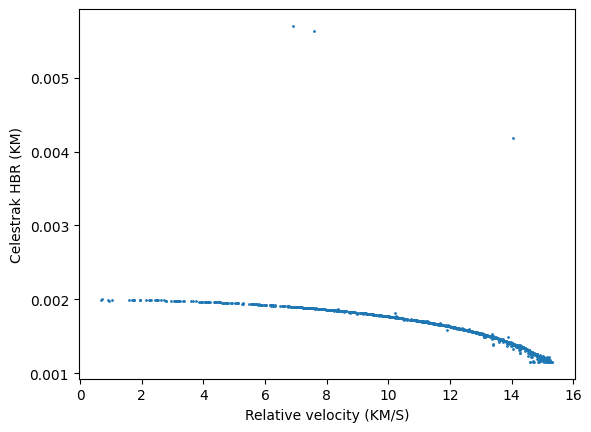

In [8]:
#리스트에 저장
# data = pd.read_csv('C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/Alfano/Alfano_24d13h_HBR.csv')
data = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Main/Alfano Pcmax/Conjunction Assesement Result/Spacemap_CA_Result(Variable_HBR)/Spacemap_CA_09m24d13h_HBR.csv')
x1,y1,z1=[],[],[]
for i in range(len(data)):
    if data['OBJECT_CLASS_1'][i]=='Unknown'  and (data['OBJECT_CLASS_2'][i]=='Rocket Mission Related Object' 
         or data['OBJECT_CLASS_2'][i]=='Rocket Debris' or data['OBJECT_CLASS_2'][i]=='Other Debris' 
         or data['OBJECT_CLASS_2'][i]=='Payload Debris'or data['OBJECT_CLASS_2'][i]=='Rocket Fragmentation Debris'
         or data['OBJECT_CLASS_2'][i]=='Payload Fragmentation Debris' or data['OBJECT_CLASS_2'][i]=='Payload Mission Related Object'):
        x1.append(data['TCA_RELATIVE_SPEED'][i])
        y1.append(data['HBR_CELESTRAK'][i])
print(len(y1))
plt.scatter(x1,y1,s=1)
plt.ylabel('Celestrak HBR (KM)')
plt.xlabel('Relative velocity (KM/S)')
plt.show()
# 예외 케이스 뺴고 다 반영해서  함수fitting 한다.
      

Degree 1 - Polynomial (R-squared: 0.6149, AIC: -21024.3331)
Degree 2 - Polynomial (R-squared: 0.6987, AIC: -21324.5386)
Degree 3 - Polynomial (R-squared: 0.7033, AIC: -21341.5760)
Degree 4 - Polynomial (R-squared: 0.7046, AIC: -21344.8780)
Logarithmic Model (R-squared: 0.4546, AIC: -20593.6518)
Exponential Model (R-squared: 0.7044, AIC: -21348.0282
Best Model: 4
Best Parameters: [-6.34584721e-08  1.78939333e-06 -2.16509875e-05  9.22864007e-05
  1.87379527e-03]
Best AIC: -21344.8780
Best R-squared: 0.7046


C:\Users\VDRC\AppData\Local\Temp\ipykernel_1600\420701674.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df,pd.DataFrame({'R-squared':[r2],'MSE':[mse],'MAPE':[mape]})], ignore_index=True)
C:\Users\VDRC\AppData\Local\Temp\ipykernel_1600\420701674.py:70: RuntimeWarning: invalid value encountered in log
  return a *np.log(list(map(lambda x: x * b, x))) + c
C:\Users\VDRC\AppData\Local\Temp\ipykernel_1600\420701674.py:70: RuntimeWarning: divide by zero encountered in log
  return a *np.log(list(map(lambda x: x * b, x))) + c


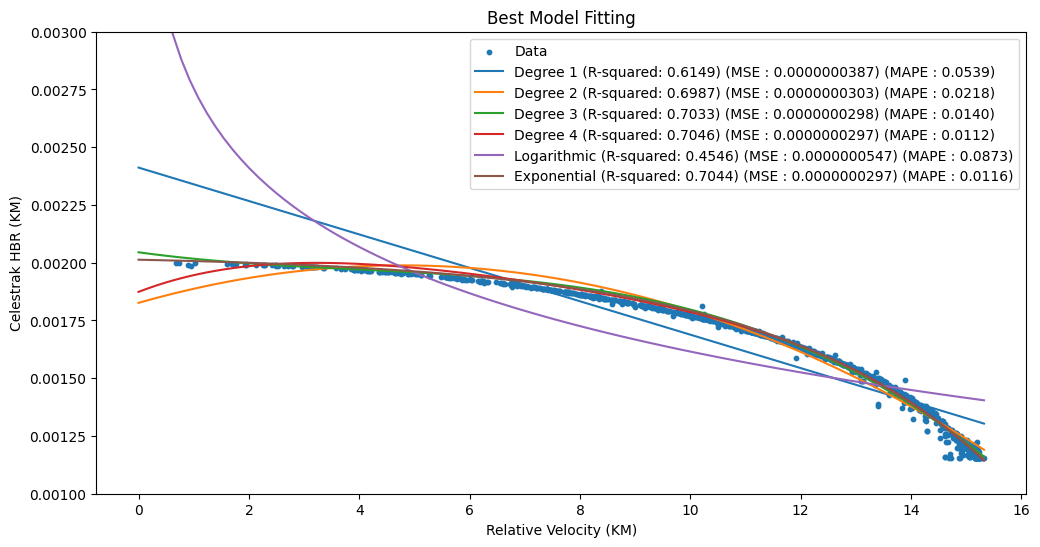

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
# Data (x1, y1 assumed to be already defined)
x = x1
y = y1
result_df = pd.DataFrame(columns=['R-squared', 'MSE', 'MAPE'])

# result_df = pd.DataFrame(columns=['R-squared','MSE','MAPE'])
# result_df.index = ['Degree1','Degree2','Degree3','Degree4','logarithmic','exponential']
# Define a function to calculate AIC
def calculate_aic(y, y_pred, num_params):
    resid = y - y_pred
    sse = np.sum(resid**2)
    aic = len(y) * np.log(sse / len(y)) + 2 * num_params
    return aic

# Initialize variables for the best model
best_degree = None
best_params = None
best_aic = float('inf')
best_r2 = -1

max_degree = 4  # Maximum polynomial degree to test

plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Data', s=10)

for degree in range(1, max_degree + 1):
    # Polynomial model
    def polynomial_model(x, *coeffs):
        return np.polyval(coeffs, x)

    # Fit polynomial model
    coeffs, _ = curve_fit(polynomial_model, x, y, maxfev=10000, p0=np.random.randn(degree + 1))

    # Predict with the model
    y_pred = polynomial_model(x, *coeffs)

    # Calculate R-squared
    r2 = r2_score(y, y_pred)

    # Calculate AIC
    aic = calculate_aic(y, y_pred, degree + 1)

    # Output model info
    print(f"Degree {degree} - Polynomial (R-squared: {r2:.4f}, AIC: {aic:.4f})")

    # Plot data and predictions
    mse = mean_squared_error(y, y_pred)
    mape =mean_absolute_percentage_error(y, y_pred)
    x_fit =np.linspace(0,max(x), 100)
    y_fit = polynomial_model(x_fit, *coeffs)
    label = f'Degree {degree} (R-squared: {r2:.4f}) (MSE : {mse:.10f}) (MAPE : {mape:.4f})'
    plt.plot(x_fit, y_fit, label=label)

    # Update the best model
    if r2 > best_r2:
        best_degree = degree
        best_params = coeffs
        best_aic = aic
        best_r2 = r2
    
    result_df = pd.concat([result_df,pd.DataFrame({'R-squared':[r2],'MSE':[mse],'MAPE':[mape]})], ignore_index=True)
# Logarithmic model
def logarithmic_model(x, a, b, c):
    return a *np.log(list(map(lambda x: x * b, x))) + c

log_params, _ = curve_fit(logarithmic_model, x, y, maxfev=10000)

y_pred_log = logarithmic_model(x, *log_params)
r2_log = r2_score(y, y_pred_log)
aic_log = calculate_aic(y, y_pred_log, 3)

print(f"Logarithmic Model (R-squared: {r2_log:.4f}, AIC: {aic_log:.4f})")
mse_log = mean_squared_error(y, y_pred_log)
mape_log =mean_absolute_percentage_error(y, y_pred_log)
x_fit_log = np.linspace(0,max(x), 100)
y_fit_log = logarithmic_model(x_fit_log, *log_params)
plt.plot(x_fit_log, y_fit_log, label=f'Logarithmic (R-squared: {r2_log:.4f}) (MSE : {mse_log:.10f}) (MAPE : {mape_log:.4f})')

if r2_log > best_r2:
    best_degree = "Logarithmic"
    best_params = log_params
    best_aic = aic_log
    best_r2 = r2_log

# Exponential model
def exponential_model(x, a, b, c):
    return a * np.exp(list(map(lambda x: x * b, x))) + c

exp_params, _ = curve_fit(exponential_model, x, y, maxfev=10000)

y_pred_exp = exponential_model(x, *exp_params)
r2_exp = r2_score(y, y_pred_exp)
aic_exp = calculate_aic(y, y_pred_exp, 3)

print(f"Exponential Model (R-squared: {r2_exp:.4f}, AIC: {aic_exp:.4f}")
mse_exp = mean_squared_error(y, y_pred_exp)
mape_exp =mean_absolute_percentage_error(y, y_pred_exp)
x_fit_exp = np.linspace(0,max(x), 100)
y_fit_exp = exponential_model(x_fit_exp, *exp_params)
plt.plot(x_fit_exp, y_fit_exp, label=f'Exponential (R-squared: {r2_exp:.4f}) (MSE : {mse_exp:.10f}) (MAPE : {mape_exp:.4f})')

if r2_exp > best_r2:
    best_degree = "Exponential"
    best_params = exp_params
    best_aic = aic_exp
    best_r2 = r2_exp

# Output the best model
print(f"Best Model: {best_degree}")
print(f"Best Parameters: {best_params}")
print(f"Best AIC: {best_aic:.4f}")
print(f"Best R-squared: {best_r2:.4f}")

plt.legend(fontsize=10)
plt.xlabel('Relative Velocity (KM)')
plt.ylabel('Celestrak HBR (KM)')
plt.ylim(0.001, 0.003)
plt.title('Best Model Fitting')
plt.show()

result_df = pd.concat([result_df,pd.DataFrame({'R-squared':[r2_log,r2_exp],'MSE':[mse_log,mse_exp],'MAPE':[mape_log,mape_exp]})], ignore_index=True)
result_df.index=['Degree1', 'Degree2', 'Degree3', 'Degree4', 'logarithmic', 'exponential']
result_df.to_csv('./result.csv', index=True)  

# 지수함수로 HBR 계산

이전 결과와 지수함수를 이용한 결과 비교 (boxplot, mse, mape)

## 1. 기존결과

이상치 개수: 16
총 개수: 1232
이상치 비율 0.012987012987012988
MSE :  2.111844370610146e-11
MAPE :  0.8155376795060386


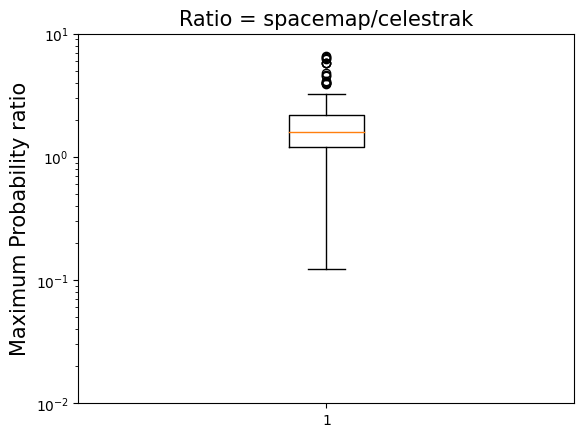

In [6]:
# primary unknown일때의 error 분포
data = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Alfano/Alfano_24d13h_total_HBR.csv')
# data = pd.read_csv('C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/Alfano/Alfano_24d13h_HBR.csv')

data = data[data['objectClass1']=='Unknown']
fig, ax1 = plt.subplots()
data = data [(data['objectClass1']=='Unknown') & ((data['objectClass2']=='Rocket Mission Related Object')
        | (data['objectClass2']=='Rocket Debris') | (data['objectClass2']=='Other Debris') 
        | (data['objectClass2']=='Payload Debris')| (data['objectClass2']=='Rocket Fragmentation Debris')
        | (data['objectClass2']=='Payload Fragmentation Debris') | (data['objectClass2']=='Payload Mission Related Object'))]
ax1.boxplot(data['error(ratio)'])
# ax1.set_ylim(-2,2)
ax1.set_title('Ratio = spacemap/celestrak',fontsize=15)
ax1.set_ylabel('Maximum Probability ratio',fontsize=15)

ax1.set_yscale('log')
ax1.set_ylim(1e-02,10)



Q1 = np.percentile(data['error(ratio)'], 25)
Q3 = np.percentile(data['error(ratio)'], 75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data['error(ratio)'][(data['error(ratio)'] < lower_bound) | (data['error(ratio)']> upper_bound)]

# 이상치 개수 출력
outlier_count = len(outliers)
total_count = len(data['error(ratio)']) 
mse = mean_squared_error(data['celestrak_prob'], data['spacemap_prob'])
mape =mean_absolute_percentage_error(data['celestrak_prob'], data['spacemap_prob'])
print("이상치 개수:", outlier_count )
print("총 개수:", total_count )
print("이상치 비율", outlier_count/total_count)
print("MSE : ",mse)
print("MAPE : ",mape)


총 pair 개수: 1232
1e-1 범위 밖 개수: 0
1e-1 범위 내 개수 : 1232
범위 밖 비율 : 0.0%
범위 내 비율 : 100.0%


Text(1232, 0.1231008658535682, '0.1231')

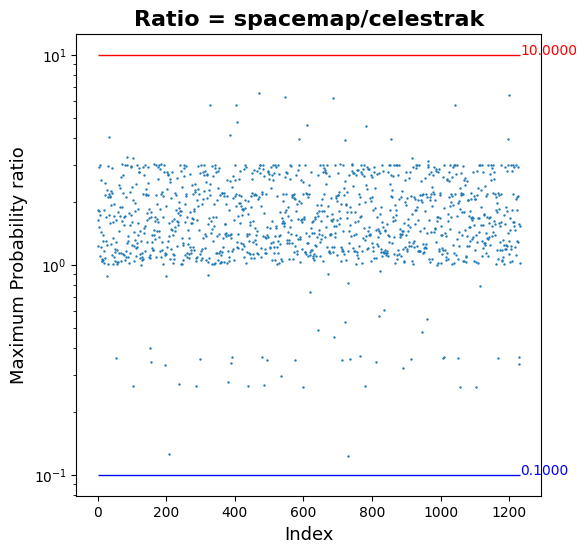

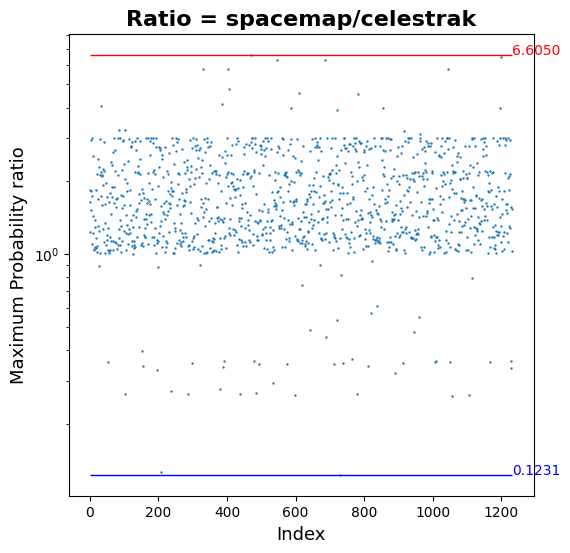

In [18]:
plt.figure(figsize=(6,6))
data_total=data

data_valid  = [value for value in data['error(ratio)'] if value >= 0.1 and value <= 10 ]

plt.scatter(np.arange(len(data_total['error(ratio)'])),data_total['error(ratio)'],s=0.5)
plt.title('Ratio = spacemap/celestrak', fontsize=16, fontweight='bold')
plt.xlabel(xlabel="Index",fontsize=13)
plt.ylabel(ylabel="Maximum Probability ratio",fontsize=13)
plt.yscale('log')

print("총 pair 개수:", len(data_total))
print("1e-1 범위 밖 개수:", len(data_total['error(ratio)'])- len(data_valid))
print('1e-1 범위 내 개수 :',len(data_valid))
print(f"범위 밖 비율 : {round((len(data_total['error(ratio)'])- len(data_valid))*100/len(data_total['error(ratio)']),2)}%")
print(f"범위 내 비율 : {round(len(data_valid)*100/len(data_total['error(ratio)']),2)}%")

plt.hlines(10, 0, len(data_total), color='red', linestyle='solid', linewidth=1)
plt.hlines(0.1, 0, len(data_total), color='b', linestyle='solid', linewidth=1)
plt.text(len(data_total['error(ratio)']), 10, f'{10:.4f}', fontsize=10, color='red')
plt.text(len(data_total['error(ratio)']), 0.1, f'{0.1:.4f}', fontsize=10, color='b')
plt.figure(figsize=(6,6))

# 특정 범위내 scatter
plt.scatter(np.arange(len(data_valid)),data_valid,s=0.5)
plt.title('Ratio = spacemap/celestrak', fontsize=16, fontweight='bold')
plt.xlabel(xlabel="Index",fontsize=13)
plt.ylabel(ylabel="Maximum Probability ratio",fontsize=13)
plt.yscale('log')

plt.hlines(max(data_valid), 0, len(data_valid), color='red', linestyle='solid', linewidth=1)
plt.hlines(np.min(np.array(data_valid)), 0, len(data_valid), color='b', linestyle='solid', linewidth=1)
plt.text(len(data_valid), max(data_valid), f'{max(data_valid):.4f}', fontsize=10, color='red')
plt.text(len(data_valid), np.min(np.array(data_valid)), f'{np.min(data_valid):.4f}', fontsize=10, color='b')



지수함수 반영

In [54]:
import matlab.engine
from math import exp
eng=matlab.engine.start_matlab()
eng.addpath('C:/Users/VDRC/Documents/MATLAB/single_covariance_maximum_Pc/Main/ProbabilityOfCollisionCode',nargout=0)
Tol     = 1e-09
HBRType = 'squareEquArea'

In [27]:
def exponential_model2(x, a, b, c):
    return a * np.exp(b*x) + c


In [20]:
file_celestrak = 'C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/objects/spacetrack_24d0800h.txt'
# file_celestrak = 'C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/objects/spacetrack_24d0800h.txt'

with open(file_celestrak) as f:
    lines = f.read().splitlines()
extracted_data = [lines]
flattened_data = [item for sublist in extracted_data for item in sublist]
filtered_data = [item for item in flattened_data if item.strip() != '']

result = {}
key = None
for i, item in enumerate(filtered_data):
    if i % 3 == 1:
        key = item.strip()[2:7]
        
        result[key] = {
            "1": filtered_data[i],
            "2": filtered_data[i + 1]
        }


In [ ]:
Celestrak_data = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/celesresult/sort-minRange_24d13h.csv')
file_celestrak = 'C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/objects/size_24d13h_primary.txt'
# file_celestrak = 'C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/objects/size_24d13h_primary.txt'

with open(file_celestrak, "r") as file:
    size_dic_p = json.load(file)
#secondary 사이즈 정보
file_celestrak = 'C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/objects/size_24d13h_secondary.txt'
# file_celestrak = 'C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/objects/size_24d13h_secondary.txt'
with open(file_celestrak, "r") as file:
    size_dic_s = json.load(file)
result_df = pd.DataFrame(columns=['category','index','NORAD_CAT_ID_1','OBJECT_NAME_1','Shape1','DSE_1',\
                                  'NORAD_CAT_ID_2','OBJECT_NAME_2','Shape2','DSE_2','TCA',\
                                  'TCA_RANGE','TCA_RELATIVE_SPEED','PcMax','error(ratio)'])
for i in tqdm(range(len(Celestrak_data))):

    try:
        TCA = str(Celestrak_data['TCA'][i])
        date_format = "%Y-%m-%d %H:%M:%S.%f"
        TCA = datetime.strptime(TCA, date_format)

        obj1 = Celestrak_data['NORAD_CAT_ID_1'][i]
        obj2 = Celestrak_data['NORAD_CAT_ID_2'][i]
        if str(obj1) not in list(result.keys()) or str(obj2) not in list(result.keys()):
            continue
        if str(Celestrak_data['NORAD_CAT_ID_1'][i]) not in size_dic_p.keys():
            continue
        if str(Celestrak_data['NORAD_CAT_ID_2'][i]) not in size_dic_s.keys():
            continue
        
        t1 = size_dic_p[str(Celestrak_data['NORAD_CAT_ID_1'][i])]
        t2 = size_dic_s[str(Celestrak_data['NORAD_CAT_ID_2'][i])]
        if t1['objectClass']!='Unknown':
            continue
         
        Line11 = result[str(obj1)]['1']
        Line12 = result[str(obj1)]['2']
        Line21 = result[str(obj2)]['1']
        Line22 = result[str(obj2)]['2']



        yr, mon, day = TCA.year, TCA.month, TCA.day
        hour, min, sec = TCA.hour, TCA.minute, TCA.second
        microsec = TCA.microsecond      
        total_seconds = sec + (microsec / 1000000)
        jd, fr = jday(yr, mon, day, hour, min, total_seconds)    
   

        satellite1 = Satrec.twoline2rv(str(Line11),str(Line12) )
        e1, r1, v1 = satellite1.sgp4(jd, fr) #TCA 시점 state vector

        satellite2 = Satrec.twoline2rv(str(Line21), str(Line22)) 
        e2, r2, v2 = satellite2.sgp4(jd, fr)#TCA 시점 state vector        
        r1 = np.array(r1)
        r2 = np.array(r2)
        Range = (np.linalg.norm(r1-r2))
        v1 = np.array(v1)
        v2 = np.array(v2)
        velocity = (np.linalg.norm(v1-v2))

   
        HBR = exponential_model2(velocity, *exp_params)
      

        true_Range = Celestrak_data['TCA_RANGE'][i]
        true_velocity = Celestrak_data['TCA_RELATIVE_SPEED'][i]
        prob_celestrak = Celestrak_data['MAX_PROB'][i]
        # r1      = matlab.double(list(r1)) # 그래프 추이 찍어보기? 뭔가 이상함.
        # v1      = matlab.double(list(v1)) #문제없음 
        # r2      = matlab.double(list(r2))
        # v2      = matlab.double(list(v2)) # 문제 없음
        # prob_berend = eng.Pc2D_Berend(r1,v1,r2,v2,HBR,Tol,HBRType)
        ar=3
        sd_max = Range/sqrt(2)
        prob_Alfano = exp(-Range**2/(2*sd_max**2))*(1-exp(-ar*HBR**2/(2*sd_max**2)))
        
        result_df = pd.concat([result_df, pd.DataFrame({'category': ['Celestrak'],'index':[i],\
                'OBJECT_NAME_1':[Celestrak_data['OBJECT_NAME_1'][i]],'Shape1':[t1['shape']],\
                'NORAD_CAT_ID_1':[Celestrak_data['NORAD_CAT_ID_1'][i]],'DSE_1':[Celestrak_data['DSE_1'][i]],\
                'OBJECT_NAME_2':[Celestrak_data['OBJECT_NAME_2'][i]],'Shape2':[t2['shape']],\
                'NORAD_CAT_ID_2':[Celestrak_data['NORAD_CAT_ID_2'][i]],'DSE_2':[Celestrak_data['DSE_2'][i]], \
                'TCA_RANGE':[true_Range], 'TCA_RELATIVE_SPEED':[true_velocity] ,'TCA':[Celestrak_data['TCA'][i]],\
                'PcMax':[prob_celestrak], 'error(ratio)':[0]})], ignore_index=True)
        
        result_df = pd.concat([result_df, pd.DataFrame({'category': ['spacemap'],'index':[i],\
                'OBJECT_NAME_1':[Celestrak_data['OBJECT_NAME_1'][i]],'Shape1':[t1['shape']],\
                'NORAD_CAT_ID_1':[str(obj1)],'DSE_1':[str(jd+fr-satellite1.jdsatepoch-satellite1.jdsatepochF)],\
                'OBJECT_NAME_2':[Celestrak_data['OBJECT_NAME_2'][i]],'Shape2':[t2['shape']],\
                'NORAD_CAT_ID_2':[str(obj2)], 'DSE_2':[str(jd+fr-satellite2.jdsatepoch-satellite2.jdsatepochF)],\
                'TCA_RANGE':[Range], 'TCA_RELATIVE_SPEED':[velocity],'TCA':[Celestrak_data['TCA'][i]],\
                'PcMax':[prob_Alfano],'error(ratio)':[(prob_Alfano)/(prob_celestrak)]})], ignore_index=True)
    except matlab.engine.MatlabExecutionError as e:
        # MATLAB 함수 내에서 오류가 발생한 경우
        continue

result_df.to_csv('./Alfano/Alfano_24d13h_Unknown.csv', index=False)         

In [ ]:
data_HBR =  pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Alfano/Alfano_24d13h_Unknown.csv')
result_df = pd.DataFrame(columns=['Index','Range','Velocity', 'spacemap_HBR' , 'celestrak_HBR','spacemap_prob'\
                                  ,'celestrak_prob','error(ratio)'\
                                  ,'NORAD_CAT_ID_1','OBJECT_NAME_1','objectClass1','Shape1' \
                                  ,'Span1','Diameter1','Height1','Width1','Depth1'\
                                  ,'NORAD_CAT_ID_2','OBJECT_NAME_2','objectClass2','Shape2'\
                                  ,'Span2','Diameter2','Height2','Width2','Depth2'\
                                    ])
# data_HBR =  pd.read_csv('C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/Alfano/Alfano_24d13h_starlink만.csv')

for i in tqdm(range(len(data_HBR))):
    if i%2==0:
        TCA = str(data_HBR['TCA'][i])
        date_format = "%Y-%m-%d %H:%M:%S.%f"
        TCA = datetime.strptime(TCA, date_format)

        obj1 = data_HBR['NORAD_CAT_ID_1'][i]
        obj2 = data_HBR['NORAD_CAT_ID_2'][i]
        if str(obj1) not in list(result.keys()) or str(obj2) not in list(result.keys()):
        
            continue
        if str(data_HBR['NORAD_CAT_ID_1'][i]) not in size_dic_p.keys():
            continue
        if str(data_HBR['NORAD_CAT_ID_2'][i]) not in size_dic_s.keys():
            continue

        t1 = size_dic_p[str(data_HBR['NORAD_CAT_ID_1'][i])]
        t2 = size_dic_s[str(data_HBR['NORAD_CAT_ID_2'][i])]
        


        Line11 = result[str(obj1)]['1']
        Line12 = result[str(obj1)]['2']
        Line21 = result[str(obj2)]['1']
        Line22 = result[str(obj2)]['2']

        yr, mon, day = TCA.year, TCA.month, TCA.day
        hour, min, sec = TCA.hour, TCA.minute, TCA.second
        microsec = TCA.microsecond      
        total_seconds = sec + (microsec / 1000000)
        jd, fr = jday(yr, mon, day, hour, min, total_seconds)    

        satellite1 = Satrec.twoline2rv(str(Line11),str(Line12) )
        e1, r1, v1 = satellite1.sgp4(jd, fr) #TCA 시점 state vector

        satellite2 = Satrec.twoline2rv(str(Line21), str(Line22)) 
        e2, r2, v2 = satellite2.sgp4(jd, fr)#TCA 시점 state vector        
        Range = round(np.linalg.norm(np.array(r1)-np.array(r2)),3)
        Velocity = round(np.linalg.norm(np.array(v1)-np.array(v2)),3)
        # r1      = matlab.double(list(np.array(r1))) # 그래프 추이 찍어보기? 뭔가 이상함.
        # v1      = matlab.double(list(np.array(v1))) #문제없음 
        # r2      = matlab.double(list(np.array(r2)))
        # v2      = matlab.double(list(np.array(v2))) # 문제 없음
        hbr = exponential_model2(velocity, *exp_params)
      
        
        AR=3
        sd_max = Range/sqrt(2)
        prob_Alfano_6 = exp(-Range**2/(2*sd_max**2))*(1-exp(-AR*hbr**2/(2*sd_max**2)))
        prob_celestrak = data_HBR['PcMax'][i]
        initial_HBR = hbr
        initial_prob = prob_Alfano_6

        while prob_celestrak != prob_Alfano_6:
          
            if max(prob_celestrak,prob_Alfano_6)/np.minimum(prob_celestrak,prob_Alfano_6) <1.0001: 
                break
            if prob_celestrak > prob_Alfano_6:
                hbr+=0.00000005
            else:
                hbr-=0.00000005

            prob_Alfano_6 = exp(-Range**2/(2*sd_max**2))*(1-exp(-AR*hbr**2/(2*sd_max**2)))
            
         
        result_df = pd.concat([result_df, pd.DataFrame({'Index':[data_HBR['index'][i]], 'Range':[Range],'Velocity':[Velocity],\
                    'spacemap_HBR':[initial_HBR] , 'celestrak_HBR':[hbr] , 'spacemap_prob':[initial_prob],\
                    'celestrak_prob':[prob_celestrak], 'error(ratio)':[initial_prob/prob_celestrak],\
                    'NORAD_CAT_ID_1':[t1['satno']],'OBJECT_NAME_1':Celestrak_data['OBJECT_NAME_1'][data_HBR['index'][i]],'objectClass1':t1['objectClass'],\
                    'Span1':[t1['span']],'Diameter1':[t1['diameter']],'Height1':[t1['height']],'Width1':[t1['width']],\
                    'Depth1':[t1['depth']],\
                    'NORAD_CAT_ID_2':[t2['satno']],'OBJECT_NAME_2':[Celestrak_data['OBJECT_NAME_2'][data_HBR['index'][i]]],'objectClass2':t2['objectClass'],\
                    'Span2':[t2['span']],'Diameter2':[t2['diameter']],'Height2':[t2['height']],'Width2':[t2['width']],\
                    'Depth2':[t2['depth']], 'Shape1':[t1['shape']],'Shape2':[t2['shape']]})], ignore_index=True)
result_df.to_csv('./Alfano/Alfano_24d13h_Unknown_HBR.csv', index=False)    

이상치 개수: 0
총 개수: 1232
이상치 비율 0.0
MSE :  3.6050815212679254e-12
MAPE :  0.4373245635853811


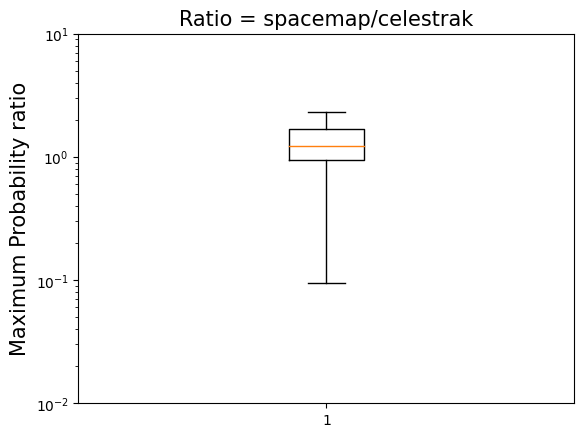

In [23]:
# primary unknown일때의 error 분포
data = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Alfano/Alfano_24d13h_Unknown_HBR.csv')
# data = pd.read_csv('C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/Alfano/Alfano_24d13h_HBR.csv')
data = data [(data['objectClass1']=='Unknown') & ((data['objectClass2']=='Rocket Mission Related Object')
        | (data['objectClass2']=='Rocket Debris') | (data['objectClass2']=='Other Debris') 
        | (data['objectClass2']=='Payload Debris')| (data['objectClass2']=='Rocket Fragmentation Debris')
        | (data['objectClass2']=='Payload Fragmentation Debris') | (data['objectClass2']=='Payload Mission Related Object'))]
# data = data[data['objectClass1']=='Unknown']
fig, ax1 = plt.subplots()

ax1.boxplot(data['error(ratio)'])
# ax1.set_ylim(-2,2)
ax1.set_title('Ratio = spacemap/celestrak',fontsize=15)
ax1.set_ylabel('Maximum Probability ratio',fontsize=15)

ax1.set_yscale('log')
ax1.set_ylim(1e-02,1e1)



Q1 = np.percentile(data['error(ratio)'], 25)
Q3 = np.percentile(data['error(ratio)'], 75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data['error(ratio)'][(data['error(ratio)'] < lower_bound) | (data['error(ratio)']> upper_bound)]

# 이상치 개수 출력
outlier_count = len(outliers)
total_count = len(data['error(ratio)']) 
mse = mean_squared_error(data['celestrak_prob'], data['spacemap_prob'])
mape =mean_absolute_percentage_error(data['celestrak_prob'], data['spacemap_prob'])
print("이상치 개수:", outlier_count )
print("총 개수:", total_count )
print("이상치 비율", outlier_count/total_count)
print("MSE : ",mse)
print("MAPE : ",mape)

총 pair 개수: 1232
1e-1 범위 밖 개수: 2
1e-1 범위 내 개수 : 1230
범위 밖 비율 : 0.16%
범위 내 비율 : 99.84%


Text(1230, 0.7732184211055051, '0.7732')

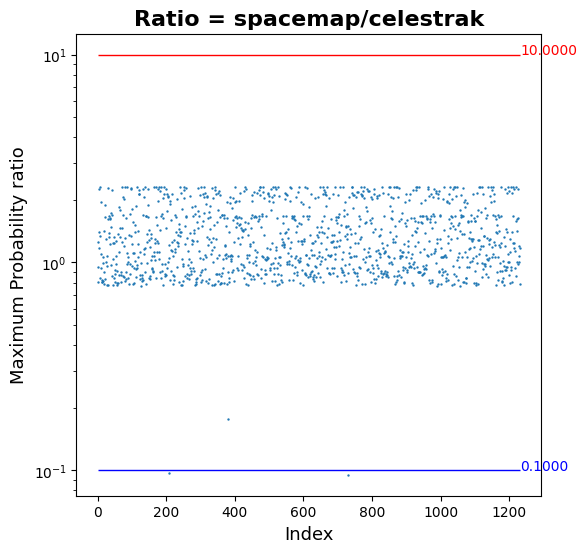

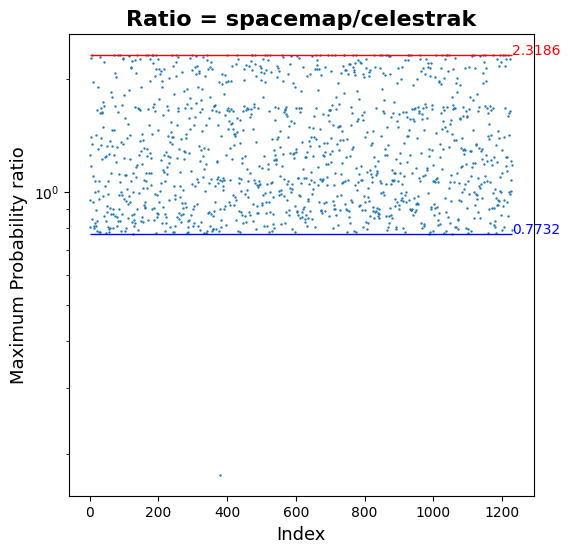

In [25]:
plt.figure(figsize=(6,6))
data_total = data
# data_total = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Berend/Berend_24d13h_total.csv')
data_valid  = [value for value in data_total['error(ratio)'] if value >= 0.1 and value <= 10 ]

plt.scatter(np.arange(len(data_total['error(ratio)'])),data_total['error(ratio)'] ,s=0.5)
plt.title('Ratio = spacemap/celestrak', fontsize=16, fontweight='bold')
plt.xlabel(xlabel="Index",fontsize=13)
plt.ylabel(ylabel="Maximum Probability ratio",fontsize=13)
plt.yscale('log')

print("총 pair 개수:", len(data_total))
print("1e-1 범위 밖 개수:", len(data_total['error(ratio)'])- len(data_valid))
print('1e-1 범위 내 개수 :',len(data_valid))
print(f"범위 밖 비율 : {round((len(data_total['error(ratio)'])- len(data_valid))*100/len(data_total['error(ratio)']),2)}%")
print(f"범위 내 비율 : {round(len(data_valid)*100/len(data_total['error(ratio)']),2)}%")

plt.hlines(10, 0, len(data_total), color='red', linestyle='solid', linewidth=1)
plt.hlines(0.1, 0, len(data_total), color='b', linestyle='solid', linewidth=1)
plt.text(len(data_total['error(ratio)']), 10, f'{10:.4f}', fontsize=10, color='red')
plt.text(len(data_total['error(ratio)']), 0.1, f'{0.1:.4f}', fontsize=10, color='b')
plt.figure(figsize=(6,6))
# 특정 범위내 scatter
plt.scatter(np.arange(len(data_valid)),data_valid,s=0.5)
plt.title('Ratio = spacemap/celestrak', fontsize=16, fontweight='bold')
plt.xlabel(xlabel="Index",fontsize=13)
plt.ylabel(ylabel="Maximum Probability ratio",fontsize=13)
plt.yscale('log')

plt.hlines(max(data_valid), 0, len(data_valid), color='red', linestyle='solid', linewidth=1)
plt.hlines(np.min(np.array([value for value in data_valid if value > 0.5])), 0, len(data_valid), color='b', linestyle='solid', linewidth=1)
plt.text(len(data_valid), max(data_valid), f'{max(data_valid):.4f}', fontsize=10, color='red')
plt.text(len(data_valid), np.min(np.array([value for value in data_valid if value > 0.5])), f'{np.min(np.array([value for value in data_valid if value > 0.5])):.4f}', fontsize=10, color='b')

In [135]:
# 7085	1.605	0.002	0.001757661	0.001731261	1.32E-06	1.28E-06	1.030816479
ar =3 
Range=1.605
sd_max=Range/sqrt(2)
hbr = 0.00173
prob_Alfano_6 = exp(-Range**2/(2*sd_max**2))*(1-exp(-AR*hbr**2/(2*sd_max**2)))
prob_Alfano_6

1.2822365396450434e-06

(0.0, 0.0001)

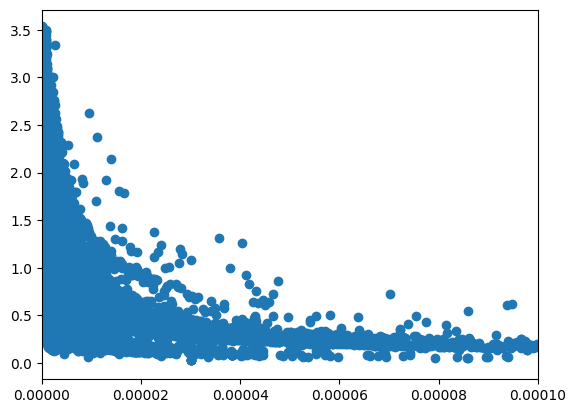

In [139]:
Celestrak_data = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/celesresult/sort-minRange_24d13h.csv')
plt.scatter(Celestrak_data['MAX_PROB'],Celestrak_data['DILUTION'])
plt.xlim(0,0.0001)